 Обучение завершено. Потребовалось  44 эпох. 
 w: [[-0.0488, 0.0824], [0.4224, 0]] 
 w0: [[0.1171, 0.2277], [0.1099, 0]] 



,Номер эпохи,Вектор весов на скрытом слое,Вектор весов на выходном слое,Вектор весов смещения на скрытом слое,Вектор весов смещения на выходном слое,Выходной вектор,Суммарная ошибка
0,1,"[0.1733, 0.2778]",0.4842,"[0.1911, 0.2926]",0.4585,[0.45],0.345642
1,2,"[0.1485, 0.257]",0.4710,"[0.1828, 0.2857]",0.4198,[0.41],0.309811
2,3,"[0.1257, 0.2378]",0.4602,"[0.1752, 0.2793]",0.3842,[0.38],0.276136
3,4,"[0.105, 0.2202]",0.4515,"[0.1683, 0.2734]",0.3518,[0.34],0.244990
4,5,"[0.0863, 0.2042]",0.4446,"[0.1621, 0.2681]",0.3226,[0.32],0.216534
5,6,"[0.0696, 0.1897]",0.4392,"[0.1565, 0.2633]",0.2964,[0.29],0.190793
6,7,"[0.0547, 0.1767]",0.4350,"[0.1515, 0.259]",0.2731,[0.27],0.167651
7,8,"[0.0415, 0.1651]",0.4318,"[0.1471, 0.2551]",0.2524,[0.25],0.146997
8,9,"[0.0299, 0.1548]",0.4293,"[0.1432, 0.2517]",0.2341,[0.23],0.128634
9,10,"[0.0197, 0.1457]",0.4274,"[0.1398, 0.2487]",0.2180,[0.21],0.112382


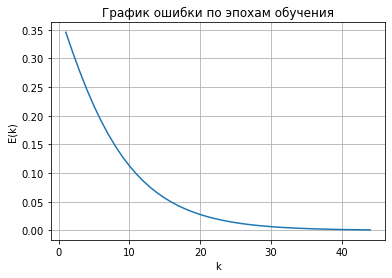

In [6]:
import matplotlib.pyplot as plt
import copy
import pandas
import math

def f(net):
    return ((1 - math.exp(-net))/(1 + math.exp(-net)))
def dF(net):
    return ((1 - math.pow(f(net), 2))/2)

class Model(object):
    
    def __init__(self):
        self.x0 = 1
        self.w = [[0.2, 0.3],
                  [0.5, 0]]
        self.w0 = [[0.2, 0.3],
                   [0.5, 0]]
    
    def fit(self, input_output, norm, target_error):

        epoch = 0
        epoch_m = []
        error = 1
        error_m = []
        weight_w1 = []
        weight_w2 = []
        weight_w01 = []
        weight_w02 = []
        output = []

        while error >= target_error:
            ys = []
            net1_1 = self.w[0][0]*input_output["input"] + self.w0[0][0]*self.x0
            out1_1 = f(net1_1)
            net1_2 = self.w[0][1]*input_output["input"] + self.w0[0][1]*self.x0
            out1_2 = f(net1_2)

            net2_1 = self.w[1][0]*(out1_1+out1_2) + self.w0[1][0]*self.x0
            out2_1 = f(net2_1)

            delta_1 = dF(net2_1)*(input_output["output"][0] - out2_1)
            ys.append(round(out2_1, 2))

            delta1_1 = (self.w[1][0]*delta_1)*dF(net1_1)
            delta1_2 = (self.w[1][0]*delta_1)*dF(net1_2)

            self.w[0][0] = round(self.w[0][0] + norm*input_output["input"]*delta1_1, 4)
            self.w[0][1] = round(self.w[0][1] + norm*input_output["input"]*delta1_2, 4)
            self.w[1][0] = round(self.w[1][0] + norm*out1_1*delta_1, 4)

            self.w0[0][0] = round(self.w0[0][0] + norm*self.x0*delta1_1, 4)
            self.w0[0][1] = round(self.w0[0][1] + norm*self.x0*delta1_2, 4)
            self.w0[1][0] = round(self.w0[1][0] + norm*self.x0*delta_1, 4)

            w = copy.deepcopy(self.w)
            w0 = copy.deepcopy(self.w0)
            weight_w1.append(w[0][:])
            weight_w2.append(w[1][0])
            weight_w01.append(w0[0][:])
            weight_w02.append(w0[1][0])
            output.append(ys)
            error = math.pow(math.pow((input_output["output"][0] - out2_1), 2), 1/2)
            error_m.append(error)
            epoch += 1
            epoch_m.append(epoch)
        
        print(" Обучение завершено. Потребовалось ", epoch, "эпох. \n w:", self.w, "\n w0:", self.w0, "\n")
        return epoch_m, error_m, weight_w1, weight_w2, weight_w01, weight_w02, output

def main():
    input_output = {
        "input": 3,
        "output": [0.1]
    }
    m = Model()
    epoch_m, error_m, weight_w1, weight_w2, weight_w01, weight_w02, output = m.fit(input_output, 0.3, math.pow(10, -3))
    d = {"Номер эпохи": epoch_m, "Вектор весов на скрытом слое": weight_w1, "Вектор весов на выходном слое": weight_w2, "Вектор весов смещения на скрытом слое": weight_w01, "Вектор весов смещения на выходном слое": weight_w02, "Выходной вектор": output, "Суммарная ошибка": error_m}
    df = pandas.DataFrame(d)
    display(df)
    plt.title("График ошибки по эпохам обучения")
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.grid()
    plt.plot(epoch_m, error_m)
    plt.show()

if __name__=="__main__":
    main()

